In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [21]:
le = LabelEncoder()
images = []
labels = []

training_path = 'data/raw/character_set1/training_data/'
testing_path = 'data/raw/character_set1/testing_data/'


In [22]:
dir_list = os.listdir(training_path)
for i in dir_list:
  dir = os.path.join(training_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

## Print out details of X and y

In [23]:
X = np.array(images)
print("len(X): ",len(X))
print("X.shape: ", X.shape)

y = np.array(labels)
print("len(y): ",len(y))
print("y.shape: ", y.shape)


len(X):  20628
X.shape:  (20628, 64, 64, 3)
len(y):  20628
y.shape:  (20628,)


In [24]:
le = LabelEncoder()
y = le.fit_transform(y)
X_sh, y_sh = shuffle(X, y, random_state=42)

# Create Keras model
create a neural network model

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

C:\Users\Dell G3\English-Braille-translator\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5147 - loss: 1.8127 - val_accuracy: 0.9125 - val_loss: 0.3150
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9314 - loss: 0.2294 - val_accuracy: 0.9261 - val_loss: 0.2504
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9497 - loss: 0.1517 - val_accuracy: 0.9365 - val_loss: 0.2077
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9629 - loss: 0.1107 - val_accuracy: 0.9464 - val_loss: 0.1955
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9662 - loss: 0.0921 - val_accuracy: 0.9479 - val_loss: 0.2006
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9660 - loss: 0.0983 - val_accuracy: 0.9530 - val_loss: 0.1849
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9733 - loss: 0.0709 - val_accuracy: 0.9535 - val_loss: 0.1749
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9772 - loss: 0.0565 - val_accu

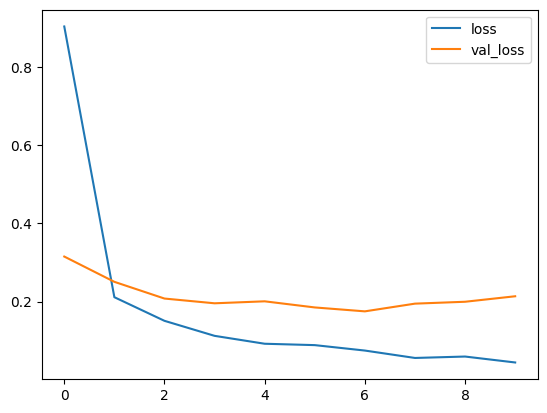

In [28]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [29]:
test_images = []
test_labels = []

dir_list = os.listdir(testing_path)
for i in dir_list:
  dir = os.path.join(testing_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [30]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
le = LabelEncoder()
y_test = le.fit_transform(y_test) 

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss,test_accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9205 - loss: 0.1228
0.0396316796541214 0.9771825671195984
